# Predictive Data Mining
IFN645 - Data Mining Technologies and Applications
Due date: 7th April, 2019

Before answering any questions we need to import the neccessary libraries and data:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
df = pd.read_csv('./data.csv')

# Toggle whether or not to show output.
verbose = True
target_value = "IsBadBuy"

C:\Users\Computer\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Task 1 - Data Selection and Distribution. 
#### 1.1 What is the proportion of cars who can be classified as a “kick”?
The proportion of *kicks* can be calculated using the function .mean() because the data is stored binary in the column *IsBadBuy*.  12.95% of the cars are *kicks* in the provided dataset.

In [2]:
if(verbose):
    print("Percentage of kicks: " + str(df[target_value].mean() * 100) + "%")

Percentage of kicks: 12.94965763333012%


#### 1.2 Did you have to fix any data quality problems? Detail them.
We found a bunch of data quality problems that we had to take care of.

Almost all data was missing on 44 of the rows, so we decided to remove them from the dataset. The percentage of *kicks* remained 12.95%.

In [3]:
c_name = "VehYear"
df[c_name] = df[c_name].fillna(0).astype(int)
if(verbose):
    print(df.loc[df[c_name] == 0])
df = df[df[c_name] != 0]

       PurchaseID  PurchaseTimestamp      PurchaseDate Auction  VehYear Make  \
20512       20512         1279065600  14/07/2010 10:00     NaN        0  NaN   
20513       20513         1279065600  14/07/2010 10:00     NaN        0  NaN   
20514       20514         1279065600  14/07/2010 10:00     NaN        0  NaN   
20515       20515         1279065600  14/07/2010 10:00     NaN        0  NaN   
20516       20516         1279065600  14/07/2010 10:00     NaN        0  NaN   
20676       20676         1286496000   8/10/2010 10:00     NaN        0  NaN   
20677       20677         1286496000   8/10/2010 10:00     NaN        0  NaN   
20678       20678         1286928000  13/10/2010 10:00     NaN        0  NaN   
20679       20679         1286928000  13/10/2010 10:00     NaN        0  NaN   
20680       20680         1286928000  13/10/2010 10:00     NaN        0  NaN   
20681       20681         1286928000  13/10/2010 10:00     NaN        0  NaN   
20682       20682         1286928000  13

Some columns required data cleaning. As we did not have a data/domain expert available we had to make some assumptions:
- *Manual* and *MANUAL* is assumed to be the same in the column *Transmission*.
- All values except 0 and 0.0 is assumed to be 1 in the column *IsOnlineSale*.
- *IsOnlineSale* should be represented as a binary value.
- *IsBadBuy* should be represented as binary value.
- All *MMR...* values should be interpreted as numbers, not strings.
- *WheelType* empty cells should be *?*.

['AUTO' 'MANUAL' 'Manual' '?']
['AUTO' 'MANUAL']


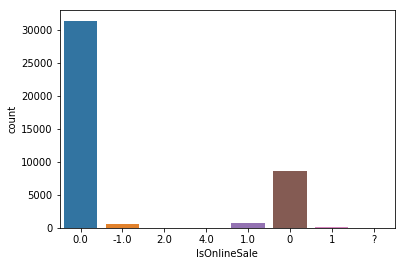

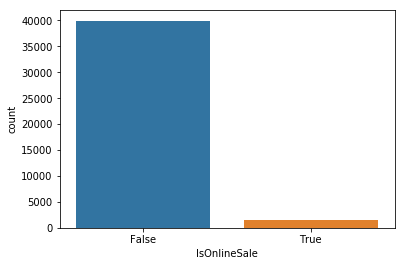

In [4]:

c_name = "Transmission"
if(verbose):
    print(df[c_name].unique())
df[c_name] = df[c_name].mask(df[c_name] == "Manual", "MANUAL")
df[c_name] = df[c_name].mask(df[c_name] == "?", "AUTO")
if(verbose):
    print(df[c_name].unique())
    
c_name = "IsOnlineSale"
if(verbose):
    dg = sns.countplot(data=df, x=c_name)
    plt.show()

    
    
df[c_name] = df[c_name].mask(df[c_name] == 0.0, "0")
df[c_name] = np.where(df[c_name] == "0", False, True)

if(verbose):
    dg = sns.countplot(data=df, x=c_name)
    plt.show()
    
c_name = "IsBadBuy"
if(verbose):
    df[c_name].unique()
df[c_name] = df[c_name].astype(bool)
if(verbose):
    df[c_name].unique()

     
for c_name in ["MMRAcquisitionAuctionAveragePrice",
              "MMRAcquisitionAuctionCleanPrice",
              "MMRAcquisitionRetailAveragePrice",
              "MMRAcquisitonRetailCleanPrice",
              "MMRCurrentAuctionAveragePrice",
              "MMRCurrentAuctionCleanPrice",
              "MMRCurrentRetailAveragePrice",
              "MMRCurrentRetailCleanPrice",
              "MMRCurrentRetailRatio",
              "VehBCost"]:
    df[c_name] = df[c_name].mask(df[c_name] == "?", 0)
    df[c_name] = df[c_name].mask(df[c_name] == "#VALUE!", 0)
    df[c_name] = pd.to_numeric(df[c_name])
    df[c_name] = df[c_name].mask(df[c_name] == 1, 0)
    



#### 1.3 Can you identify any clear patterns by initial exploration of the data using histogram or box plot?
The *VehYear* column, the year in which the car was made - does seems to have a influence on the *IsBadBuy* varible.  
It is more likely that an older car is a *kick*.

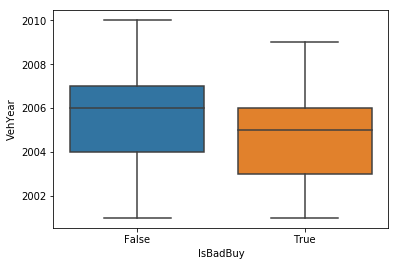

In [5]:
if(verbose):
    ax = sns.boxplot(x=target_value, y='VehYear', data=df)
    plt.show()

#### 1.4 What variables did you include in the analysis and what were their roles and measurement level set? Justify your choice.

In [6]:
# data preparation
df.drop(['PurchaseID','PurchaseTimestamp','PurchaseDate','WheelTypeID','PRIMEUNIT','AUCGUART','ForSale'],axis=1,inplace=True)
df.drop(['Color','Make','WheelType','Nationality','Size', 'TopThreeAmericanName','VNST'],axis=1,inplace=True)
df_dummies = pd.get_dummies(df)
df_dummies = df_dummies.dropna()
print(df_dummies.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41002 entries, 0 to 41475
Data columns (total 20 columns):
VehYear                              41002 non-null int32
VehOdo                               41002 non-null float64
MMRAcquisitionAuctionAveragePrice    41002 non-null float64
MMRAcquisitionAuctionCleanPrice      41002 non-null float64
MMRAcquisitionRetailAveragePrice     41002 non-null float64
MMRAcquisitonRetailCleanPrice        41002 non-null float64
MMRCurrentAuctionAveragePrice        41002 non-null float64
MMRCurrentAuctionCleanPrice          41002 non-null float64
MMRCurrentRetailAveragePrice         41002 non-null float64
MMRCurrentRetailCleanPrice           41002 non-null float64
MMRCurrentRetailRatio                41002 non-null float64
VehBCost                             41002 non-null int64
IsOnlineSale                         41002 non-null bool
WarrantyCost                         41002 non-null float64
IsBadBuy                             41002 non-null bool
A

#### 1.5 What distribution scheme did you use? What data partitioning allocation did you set? Explain your selection.

In [7]:
# undersampling 
badBuy_indices = df_dummies[df_dummies[target_value] == 0].index

sample_size = sum(df_dummies.IsBadBuy == 1)

random_indices = np.random.choice(badBuy_indices, sample_size, replace=False)

Non_badBuy_sample = df_dummies.loc[random_indices]

Badbuys = df_dummies.loc[df_dummies[target_value]==1]

sample_data = Badbuys.append(Non_badBuy_sample,ignore_index=True)

## Task 2 - Predictive Modeling Using Decision Trees

In [8]:


# target/input split
y = df_dummies[target_value]
X = df_dummies.drop([target_value],axis = 1)

# setting random state
rs = 10


X = sample_data.drop([target_value],axis = 1)
y = sample_data[target_value]

X_mat = X.as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)

C:\Users\Computer\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


#### 2.1 Build a decision tree using the default setting. 

In [9]:
model = DecisionTreeClassifier(random_state=rs)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
if(verbose):
    print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.57      0.55      0.56      1590
        True       0.56      0.58      0.57      1591

   micro avg       0.56      0.56      0.56      3181
   macro avg       0.56      0.56      0.56      3181
weighted avg       0.56      0.56      0.56      3181



#### 2.2 Build another decision tree tuned with GridSearchCV

In [10]:
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(2, 7),
          'min_samples_leaf': range(20, 60, 10)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_train, y_train)

print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))


y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.627812963212505
Test accuracy: 0.6007544797233574
              precision    recall  f1-score   support

       False       0.59      0.64      0.61      1590
        True       0.61      0.57      0.59      1591

   micro avg       0.60      0.60      0.60      3181
   macro avg       0.60      0.60      0.60      3181
weighted avg       0.60      0.60      0.60      3181

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 30}


#### 2.3 What is the significant difference do you see between these two decision tree models?
How do they compare performance-wise?
Explain why those changes may have happened.

#### 2.4 From the better model, can you identify which cars could potential be *kicks*?

## Task 3 - Predictive Modeling Using Regression

In [11]:
sample_data.info()
sample_data.drop(['Transmission_AUTO','Transmission_MANUAL','Auction_OTHER','Auction_MANHEIM','Auction_ADESA'],axis=1,inplace=True)


X = sample_data.drop([target_value],axis = 1)
y = sample_data[target_value]

X_mat = X.as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10602 entries, 0 to 10601
Data columns (total 20 columns):
VehYear                              10602 non-null int32
VehOdo                               10602 non-null float64
MMRAcquisitionAuctionAveragePrice    10602 non-null float64
MMRAcquisitionAuctionCleanPrice      10602 non-null float64
MMRAcquisitionRetailAveragePrice     10602 non-null float64
MMRAcquisitonRetailCleanPrice        10602 non-null float64
MMRCurrentAuctionAveragePrice        10602 non-null float64
MMRCurrentAuctionCleanPrice          10602 non-null float64
MMRCurrentRetailAveragePrice         10602 non-null float64
MMRCurrentRetailCleanPrice           10602 non-null float64
MMRCurrentRetailRatio                10602 non-null float64
VehBCost                             10602 non-null int64
IsOnlineSale                         10602 non-null bool
WarrantyCost                         10602 non-null float64
IsBadBuy                             10602 non-null bool
A

C:\Users\Computer\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


#### 3.1 In preparation for regression, is any imputation of missing values needed for this data set? List the variables that did.
> 509 cars need *MMR___* data  
> 44 cars have already been removed due to missing information (year)

In [12]:
if(verbose):
    print("\nThe following columns still have missing values:")
nan_list = list()
for c_name in list(sample_data):
    if(sample_data[c_name].isnull().values.any()):
        nan_list.append(c_name)
        if(verbose):
            print(c_name)

sample_data = sample_data.dropna(subset=nan_list) 


The following columns still have missing values:


#### 3.2 Apply transformation method(s) to the variable(s) that need it. List the variables that needed it

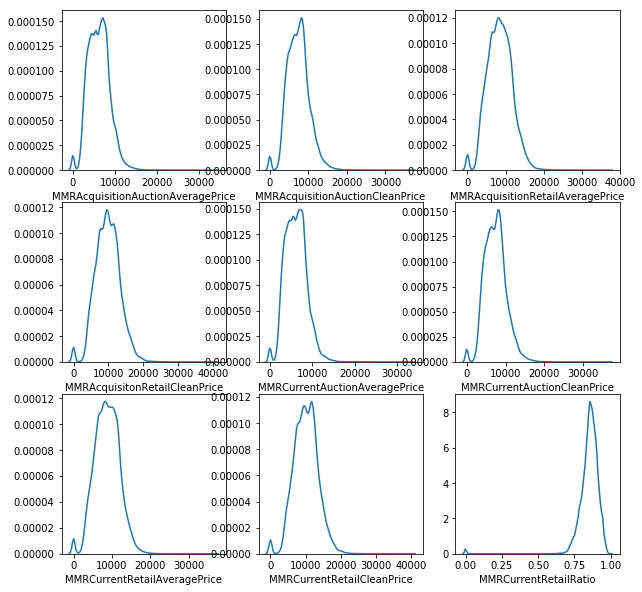

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_skewed_columns(df):
    # setting up subplots for easier visualisation
    f, axes = plt.subplots(3,3, figsize=(10,10), sharex=False)

    sns.distplot(df['MMRAcquisitionAuctionAveragePrice'].dropna(), hist=False, ax=axes[0,0])
    sns.distplot(df['MMRAcquisitionAuctionCleanPrice'].dropna(), hist=False, ax=axes[0,1])
    sns.distplot(df['MMRAcquisitionRetailAveragePrice'].dropna(), hist=False, ax=axes[0,2])
    sns.distplot(df['MMRAcquisitonRetailCleanPrice'].dropna(), hist=False, ax=axes[1,0])
    sns.distplot(df['MMRCurrentAuctionAveragePrice'].dropna(), hist=False, ax=axes[1,1])
    sns.distplot(df['MMRCurrentAuctionCleanPrice'].dropna(), hist=False, ax=axes[1,2])
    sns.distplot(df['MMRCurrentRetailAveragePrice'].dropna(), hist=False, ax=axes[2,0])
    sns.distplot(df['MMRCurrentRetailCleanPrice'].dropna(), hist=False, ax=axes[2,1])
    sns.distplot(df['MMRCurrentRetailRatio'].dropna(), hist=False, ax=axes[2,2])

    plt.show()
    
plot_skewed_columns(df)

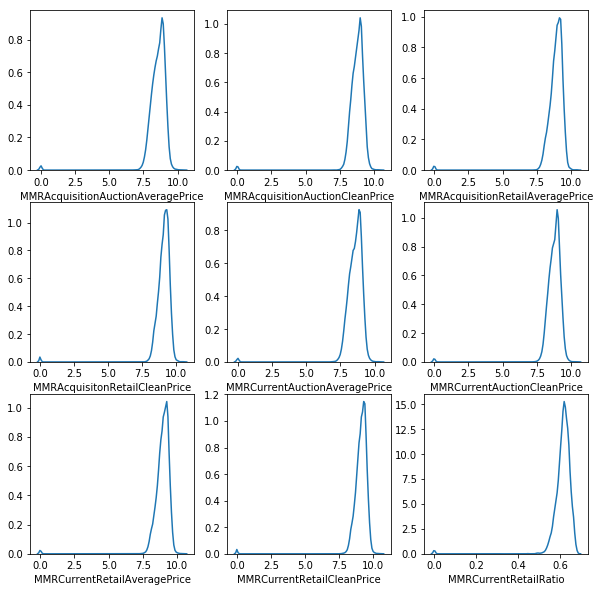

In [14]:
import numpy as np

# list columns to be transformed
columns_to_transform = ['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
                        'MMRAcquisitonRetailCleanPrice','MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
                        'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice','MMRCurrentRetailRatio']

# copy the dataframe
df_log = sample_data.copy()

# transform the columns with np.log
for col in columns_to_transform:
    df_log[col] = df_log[col].apply(lambda x: x+1)
    df_log[col] = df_log[col].apply(np.log)

# plot them again to show the distribution
plot_skewed_columns(df_log)

In [15]:
y_log = df_log[target_value]
X_log = df_log.drop([target_value], axis=1)

X_mat_log = X_log.as_matrix()
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_mat_log, y_log, test_size=0.3, stratify=y_log, 
                                                                    random_state=rs)

# standardise them
scaler_log = StandardScaler()
X_train_log = scaler_log.fit_transform(X_train_log, y_train_log)
X_test_log = scaler_log.transform(X_test_log)

C:\Users\Computer\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\Computer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Computer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Computer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


#### 3.3 Build a regression model using the default regression method with all inputs.

In [16]:
# fit it to training data
model = LogisticRegression(random_state=rs)
model.fit(X_train_log, y_train_log)

# classification report on test data
print("Train accuracy:", model.score(X_train_log, y_train_log))
print("Test accuracy:", model.score(X_test_log, y_test_log))


y_pred = model.predict(X_test_log)
if(verbose):
    print(classification_report(y_test_log, y_pred))

Train accuracy: 0.6290257377711899
Test accuracy: 0.6020119459289531
              precision    recall  f1-score   support

       False       0.60      0.62      0.61      1590
        True       0.61      0.59      0.60      1591

   micro avg       0.60      0.60      0.60      3181
   macro avg       0.60      0.60      0.60      3181
weighted avg       0.60      0.60      0.60      3181



C:\Users\Computer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### 3.3 Build a regression model using the default regression method with all inputs. Once you done it, build another one and tune it using GridSearchCV

In [17]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train_log, y_train_log)

# test the best model
print("Train accuracy:", cv.score(X_train_log, y_train_log))
print("Test accuracy:", cv.score(X_test_log, y_test_log))

y_pred = cv.predict(X_test_log)
print(classification_report(y_test_log, y_pred))

print(cv.best_params_)

Train accuracy: 0.6279477159412478
Test accuracy: 0.6001257466205596
              precision    recall  f1-score   support

       False       0.60      0.61      0.60      1590
        True       0.60      0.59      0.60      1591

   micro avg       0.60      0.60      0.60      3181
   macro avg       0.60      0.60      0.60      3181
weighted avg       0.60      0.60      0.60      3181

{'C': 10}


C:\Users\Computer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


##### 3.3.h.Name the regression function used.

we use the function LogisticRegression() to build up the model.

##### 3.3.i.How much was the difference in performance of two models build, default and optimal?

It is slightly improved as we can see the precision on True is 0.61 on default model but 0.62 on optimal model.

##### 3.3.j.Show the set parameters for the best model. What are the parameters used? Explain your decision. What are the optimal parameters?

In [18]:
print(cv.best_params_)

{'C': 10}


It came from the function GridSearchCV which trys different parameters from a typical range of values and pick up the optimal one. In sklearn logistic regression, regularisation is implemented in the hyperparameter C, which denotes the inverse of regularisation strength. Smaller C means stronger regularisation.

##### 3.3.k.Report which variables are included in the regression model.

In [19]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10602 entries, 0 to 10601
Data columns (total 15 columns):
VehYear                              10602 non-null int32
VehOdo                               10602 non-null float64
MMRAcquisitionAuctionAveragePrice    10602 non-null float64
MMRAcquisitionAuctionCleanPrice      10602 non-null float64
MMRAcquisitionRetailAveragePrice     10602 non-null float64
MMRAcquisitonRetailCleanPrice        10602 non-null float64
MMRCurrentAuctionAveragePrice        10602 non-null float64
MMRCurrentAuctionCleanPrice          10602 non-null float64
MMRCurrentRetailAveragePrice         10602 non-null float64
MMRCurrentRetailCleanPrice           10602 non-null float64
MMRCurrentRetailRatio                10602 non-null float64
VehBCost                             10602 non-null int64
IsOnlineSale                         10602 non-null bool
WarrantyCost                         10602 non-null float64
IsBadBuy                             10602 non-null bool
d

##### 3.3.l.Report the top-5 important variables (in the order) in the model.

In [20]:
# grab feature importances from the model and feature name from the original X
coef = model.coef_[0]
feature_names = X_log.columns

# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)

# limit to 5 features, you can leave this out to print out everything
indices = indices[:5]

for i in indices:
    print(feature_names[i], ':', coef[i])

MMRAcquisitionAuctionAveragePrice : -1.283571099812542
MMRAcquisitionRetailAveragePrice : 1.230958646834347
MMRCurrentRetailCleanPrice : -0.9279238248884387
MMRCurrentAuctionAveragePrice : 0.6643614498503336
MMRCurrentAuctionCleanPrice : 0.47139450855792864


##### 3.3.m.What is classification accuracy on training and test datasets?

In [21]:
print(classification_report(y_test_log, y_pred))

              precision    recall  f1-score   support

       False       0.60      0.61      0.60      1590
        True       0.60      0.59      0.60      1591

   micro avg       0.60      0.60      0.60      3181
   macro avg       0.60      0.60      0.60      3181
weighted avg       0.60      0.60      0.60      3181



##### 3.3.n.Report any sign of overfitting.

Train accuracy: 0.621749090419081
Test accuracy: 0.6089280100597296
We can see the test accuracy is lower than train accuracy due to the overfitting. 

#### 3.4 Build another regression model using the subset of inputs selected by RFE and selection by model method. Answer the followings:

In [22]:
from sklearn.feature_selection import RFECV

rfe = RFECV(estimator = LogisticRegression(random_state=rs,solver = 'lbfgs'), cv=10)
rfe.fit(X_train_log, y_train_log) # run the RFECV



X_train_sel = rfe.transform(X_train_log)
X_test_sel = rfe.transform(X_test_log)

params = {'C': [pow(10, x) for x in range(-6, 4)]}

cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train_sel, y_train_log)

# test the best model
print("Train accuracy:", cv.score(X_train_sel, y_train_log))
print("Test accuracy:", cv.score(X_test_sel, y_test_log))

y_pred = cv.predict(X_test_sel)
print(classification_report(y_test_log, y_pred))

# print parameters of the best model
print(cv.best_params_)

C:\Users\Computer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Computer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Computer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Computer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Train accuracy: 0.6292952432286754
Test accuracy: 0.5972964476579692
              precision    recall  f1-score   support

       False       0.59      0.62      0.61      1590
        True       0.60      0.58      0.59      1591

   micro avg       0.60      0.60      0.60      3181
   macro avg       0.60      0.60      0.60      3181
weighted avg       0.60      0.60      0.60      3181

{'C': 0.1}


C:\Users\Computer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


##### 3.4.a.Report which variables are included in the regression model.

In [23]:
# comparing how many variables before and after
print("Original feature set", X_train_log.shape[1])
print("Number of features after elimination", rfe.n_features_)

df_log.info()



Original feature set 14
Number of features after elimination 13
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10602 entries, 0 to 10601
Data columns (total 15 columns):
VehYear                              10602 non-null int32
VehOdo                               10602 non-null float64
MMRAcquisitionAuctionAveragePrice    10602 non-null float64
MMRAcquisitionAuctionCleanPrice      10602 non-null float64
MMRAcquisitionRetailAveragePrice     10602 non-null float64
MMRAcquisitonRetailCleanPrice        10602 non-null float64
MMRCurrentAuctionAveragePrice        10602 non-null float64
MMRCurrentAuctionCleanPrice          10602 non-null float64
MMRCurrentRetailAveragePrice         10602 non-null float64
MMRCurrentRetailCleanPrice           10602 non-null float64
MMRCurrentRetailRatio                10602 non-null float64
VehBCost                             10602 non-null int64
IsOnlineSale                         10602 non-null bool
WarrantyCost                         10602 non-null fl

##### 3.4.b.Report the top-5 important variables (in the order) in the model.

##### 3.4.c.What are the parameters used? Explain your choices. What are the optimal parameters? Which regression function is being used?

In [24]:
rfe.get_params()

{'cv': 10,
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__max_iter': 100,
 'estimator__multi_class': 'warn',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': 10,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=10, solver='lbfgs',
           tol=0.0001, verbose=0, warm_start=False),
 'min_features_to_select': 1,
 'n_jobs': None,
 'scoring': None,
 'step': 1,
 'verbose': 0}

parameter C is used, which denotes the inverse of regularisation strength. cv is given as 10. Other parameters are all default values. 

##### 3.4.d.Report any sign of overfitting.

Train accuracy: 0.616763239455599
Test accuracy: 0.6101854762653254
the Train accuracy is very close to the Test accuracy, it indicates there is no obivious overfitting.

##### 3.4.e.What is classification accuracy on training and test datasets?

In [25]:
print(classification_report(y_test_log, y_pred))

              precision    recall  f1-score   support

       False       0.59      0.62      0.61      1590
        True       0.60      0.58      0.59      1591

   micro avg       0.60      0.60      0.60      3181
   macro avg       0.60      0.60      0.60      3181
weighted avg       0.60      0.60      0.60      3181



##### 3.4.f.Did it improve/worsen the performance? Explain why those changes may have happened.

it slightly improved the performance as the Test accuracy increases from 0.6092423766111286 to 0.6101854762653254. The traning data sample only 14 variables, 

#### 3.5 Using the best regression model, which cars could potential be “kicks”? Can you provide some descriptive summary of those cars?